# Carregue as bibliotecas NumPy, Pandas, BeautifulSoup, MatPlotLib, Requests, JSON e Seaborn.

\

In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

###2 – Entre no site https://db-engines.com/en/ranking, faça um scraping e gere um DataFrame com a lista de banco de dados do Ranking.

In [31]:
html=requests.get("https://db-engines.com/en/ranking").content
soup=BeautifulSoup(html,'html5lib')

In [ ]:
tabela=soup.find('table',{'class':'dbi'}).find('tbody')
tabela

In [54]:
linhas=tabela.find_all('tr')
contalinhas=0
banco=[]
pontos=[]
for linha in linhas:
    contalinhas+=1
    if contalinhas>3:
        dado=linha.find_all('td')
        dado2=linha.find('a')
        pontos.append(float(dado[3].text))
        #ao pegar o dado do link, veja que ele monta um array com as informações, onde a primeira (0) é o nome do banco
        banco.append(dado2.contents[0])

In [57]:
dados=pd.DataFrame(banco,columns=['Banco'])
dados['Pontos']=pontos
dados

,Banco,Pontos
0,Oracle,1236.29
1,MySQL,1083.74
2,Microsoft SQL Server,824.29
3,PostgreSQL,645.54
4,MongoDB,421.65
...,...,...
415,TomP2P,0.00
416,Transwarp Hippo,0.00
417,Transwarp StellarDB,0.00
418,Upscaledb,0.00


###3 – Com a Biblioteca Seaborn gere um gráfico de colunas, indicando o nome do banco e a quantidade de pontos do banco no mês atual.

<Axes: xlabel='Banco', ylabel='Pontos'>

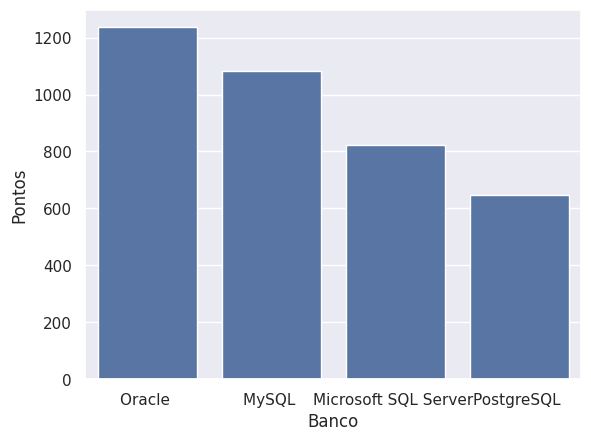

In [58]:
sns.barplot(data=dados.head(4), x='Banco', y='Pontos')

###4 – Gere um novo Dataframe com apenas as 10 primeiras posições da lista, crie um campo de Share (porcentagem de relevância de cada Banco de Dados em relação aos 10 listados, baseado na quantidade de pontos que eles tem). Informe qual é a porcentagem e o nome do banco que aparece em primeiro lugar.\

In [60]:
dados_ex4=dados.head(10)
dados_ex4

,Banco,Pontos
0,Oracle,1236.29
1,MySQL,1083.74
2,Microsoft SQL Server,824.29
3,PostgreSQL,645.54
4,MongoDB,421.65
5,Redis,157.80
6,Elasticsearch,135.35
7,IBM Db2,128.46
8,Snowflake,121.33
9,SQLite,114.32


In [62]:
total=dados_ex4['Pontos'].sum()
dados_ex4.loc[:, 'Share'] = dados_ex4['Pontos'] / total * 100
dados_ex4

,Banco,Pontos,Share
0,Oracle,1236.29,25.392245
1,MySQL,1083.74,22.259010
2,Microsoft SQL Server,824.29,16.930149
3,PostgreSQL,645.54,13.258790
4,MongoDB,421.65,8.660298
5,Redis,157.80,3.241065
6,Elasticsearch,135.35,2.779963
7,IBM Db2,128.46,2.638449
8,Snowflake,121.33,2.492005
9,SQLite,114.32,2.348026


###5 – Usando MatPlotLib gere um gráfico baseado no Share de cada banco em relação aos outros 9 da lista gerada no Exercício 4.

<function matplotlib.pyplot.show(close=None, block=None)>

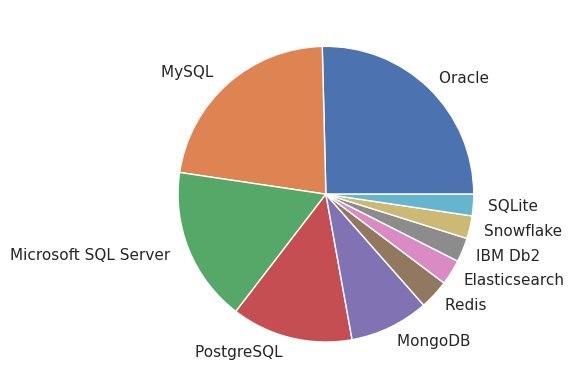

In [65]:
plt.pie(dados_ex4['Share'],labels=dados_ex4['Banco'])
plt.show

###6 – Usando o Dataframe completo, crie também uma coluna Share informado a porcentagem de relevância de cada banco em relação aos demais.

In [71]:
dados['Share'] = dados['Pontos'] / total * 100
dados

,Banco,Pontos,Share
0,Oracle,1236.29,25.392245
1,MySQL,1083.74,22.259010
2,Microsoft SQL Server,824.29,16.930149
3,PostgreSQL,645.54,13.258790
4,MongoDB,421.65,8.660298
...,...,...,...
416,Transwarp Hippo,0.00,0.000000
417,Transwarp StellarDB,0.00,0.000000
418,Upscaledb,0.00,0.000000
419,WhiteDB,0.00,0.000000


###7 – Com o Dataframe gerado no Exercício 6, gere um arquivo do tipo CSV chamado “db-ranking.csv”.

In [72]:
dados.to_csv("db-ranking.csv")

###8 – O Banco Central dispõe de um conjunto de APIs, sendo que uma delas é o valor do Dolar. Nesse endereço tem algumas delas: https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/aplicacao#!/recursos, sendo que a primeira delas é capaz de gerar a cotação do dólar de uma determinada data.
###Utilizando Json, realize uma consulta direta a API e informe a cotação de venda do dólar do dia 16/09/2008.


In [75]:
site="https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao='09-16-2008'&$top=100&$format=json"
resposta=requests.get(site)
dados=json.loads(resposta.text)

In [76]:
dados

{'@odata.context': 'https://was-p.bcnet.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata$metadata#_CotacaoDolarDia',
 'value': [{'cotacaoCompra': 1.8402,
   'cotacaoVenda': 1.841,
   'dataHoraCotacao': '2008-09-16 17:36:00.0'}]}

In [82]:
print(dados['value'][0]['cotacaoVenda'])

1.841
